In [4]:
import os
import sys
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import pubplot

In [5]:
os.environ['CODE_ROOT'] = os.environ['HOME'] + '/DESI/'

sys.path.append(os.environ['CODE_ROOT'])

In [6]:
from   vmaxer import vmaxer
from   astropy.table import Table
from   smith_kcorr import test_plots, test_nonnative_plots
from   cosmo import distmod

In [8]:
gama_kE = Table.read(os.environ['HOME'] + '/data/GAMA4/gama_gold_kE.fits')
gama_kE

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
209748,587725074990104938,134.80169161,0.00541943,17.670448,0.16614,5,528071002781935616,6,20.69154,18.777487,17.623806,17.12555,16.7443,561.963526479418,38.74854064579229,G9,336.6895087963473,-344.77276732721725,-0.29201119712561685,1.1536808,0.9656032703681418,0,6,-0.012802438816760256,0.17527509220669957,0.21718717039995156,0.5670456235874188,0.8038223482041342,0.8,-0.1611558,-0.13291201,-21.134123707977864,-21.162367503015133,38.80457201120052,38.83281580623779
537129,588848898840789129,184.21539209,-1.03669489,16.961576,0.07156,5,324336722294892544,6,19.626896,17.806122,16.912678,16.516546,16.241358,226.73735426434604,36.777615373338456,G12,211.10784811178928,13.778240299502608,-4.0400222378383175,0.89344406,0.9590927322944667,0,6,-0.14128247488344584,-0.20693114589861566,0.08799718779518459,0.1837785822606589,0.7976626668138226,0.8,-0.06941321,-0.057248004,-19.83462289187028,-19.846788095560807,36.79619935366227,36.808364557352796
382081,587727944027472289,135.23306993,1.95568309,19.110462,0.22654,4,G09_Y2_021_035,6,21.606937,20.09877,19.122538,18.54879,18.2157,795.6858082015166,39.50370806041515,G9,456.48158760084635,-460.4315484359427,21.680969625684444,0.9762325,0.6972784121110702,0,5,-0.0013580076341729863,0.2775961089412802,0.2218401822645188,0.5776936646998119,0.6203790462512304,2.12,-0.2197438,-0.48026478,-20.395342250815464,-20.134821271053386,39.50580443953617,39.24528345977409
561801,588848899377922344,184.87290284,-0.54973036,19.31083,0.23925,4,G12_Y3_013_281,6,21.496574,20.378784,19.279503,18.788294,18.447803,846.7071391866866,39.63866610815502,G12,681.1973144334473,52.315729708895546,-7.238360697540164,1.0992813,0.7660327047680001,0,5,0.03335448706113034,0.3666030933282865,0.26124136733428505,0.6921762951172632,0.6683463832521781,0.8,-0.23207252,-0.1914,-20.35700579561584,-20.39767830647819,39.6678349582135,39.70850746907585
227206,587726014009442667,212.57882544,1.21256973,19.320875,0.25749,4,G15_Y3_017_043,6,22.189722,20.593586,19.20445,18.61652,18.272427,921.0087985140573,39.82131889543513,G15,620.3405500570348,389.0924449752832,14.877260726360266,1.3891354,0.9286639809620368,0,6,0.10993538643000941,0.5704067661857459,0.3364772018215463,0.9552430704775848,0.7703694920617349,0.8,-0.24976532,-0.20599201,-20.587155607797634,-20.630928916193973,39.90803077564431,39.95180408404065
363681,587726033340137638,220.75196667,2.46013928,18.085209,0.12255,4,G15_Y4_230_347,6,20.76381,19.052786,18.098398,17.709585,17.417257,402.634402533013,38.02455439911109,G15,273.43431062882456,231.635870153189,15.121871374437344,0.95438766,0.8986876414461394,0,6,-0.07503904401220754,-0.019339020663425008,0.1520469037953717,0.3545976030376719,0.7518369655526217,0.8,-0.11887351,-0.09804001,-19.972518903299758,-19.99335240302939,38.05772779612202,38.07856129585166
209284,587725074989187472,132.63681292,0.13970627,19.025364,0.21044,4,G09_Y2_023_126,6,19.915537,19.315168,19.048653,18.926653,18.90946,731.9597312967848,39.32243594520552,G9,405.84547378406654,-448.2823166531956,1.0675392832320167,0.26651573,0.09828270012972351,0,1,-0.1963298516548892,-0.028096819973089326,-0.035049132348515116,0.09974779151553542,0.1317188079474729,2.12,-0.2041268,-0.44613278,-20.0578960856708,-19.815890111616465,39.083260007789946,3

In [9]:
def color_plot(ctype, max_col=1.0):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    idx    = np.digitize(gama_kE['MCOLOR_0P0'], np.arange(-23., -17., 1.))

    for count, jj in enumerate(np.unique(idx)):
        sample = gama_kE[(idx == jj) & (gama_kE['MCOLOR_0P0'].data >= -23.) & (gama_kE['MCOLOR_0P0'].data <= -17.)]
        nsample = len(sample)

        if nsample == 0:
            continue
    
        dbin = 0.05
        bins = np.arange(-0.5, max_col, dbin)
    
        ns, _ = np.histogram(sample[ctype], bins=bins)
    
        centres = bins[:-1] + dbin/2.
    
        plt.plot(centres, ns / nsample, color=colors[count], label=r'{:.0f} < $M_r$ < {:.0f}'.format(sample['MCOLOR_0P0'].min(),\
                                                                                                     sample['MCOLOR_0P0'].max()))

    plt.axvline(0.63, c='black', lw=0.5)
    plt.xlabel(ctype)
    plt.ylabel(r'$p$({})'.format(ctype), fontsize=14)
    plt.xlim(-0.5, max_col)
    plt.legend(frameon=False)

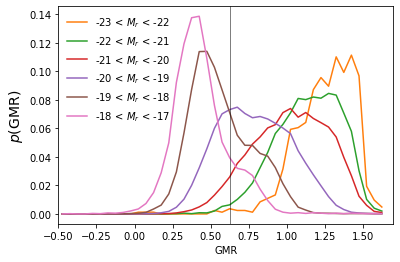

In [10]:
color_plot('GMR', max_col=1.7)

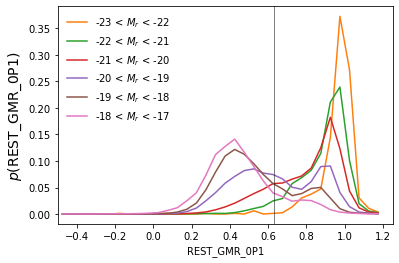

In [11]:
color_plot('REST_GMR_0P1', max_col=1.25)

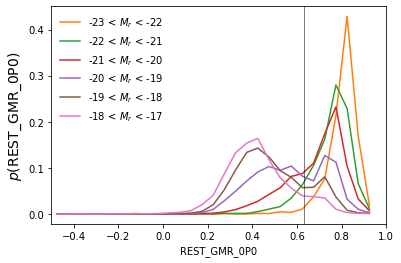

In [12]:
color_plot('REST_GMR_0P0')

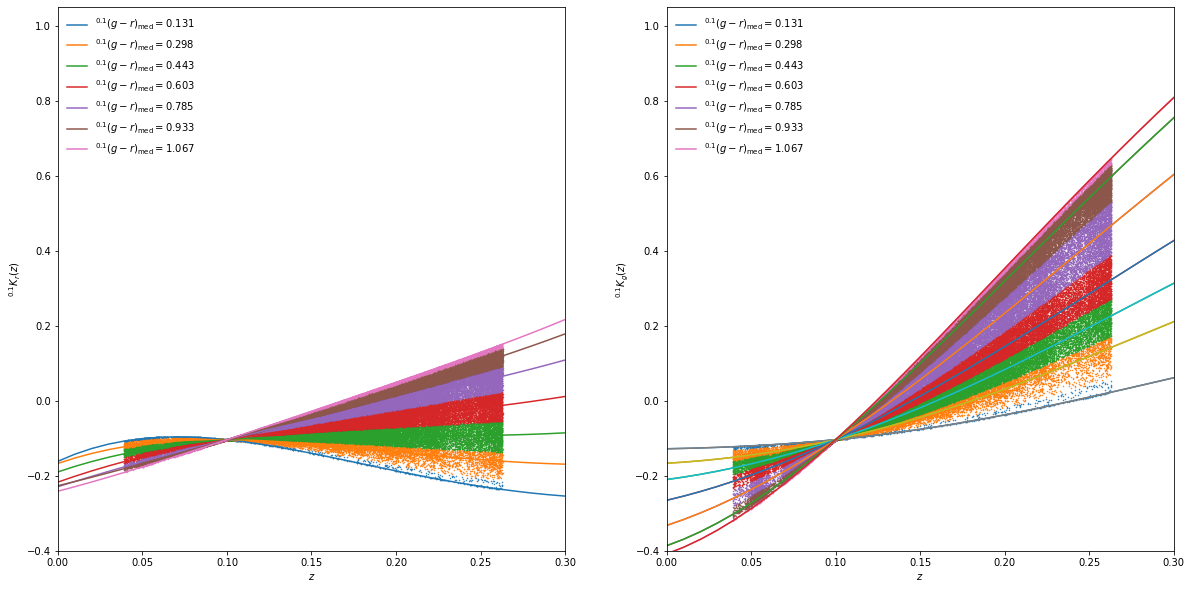

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_plots(axes)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
      
    n_in = np.count_nonzero(isin)
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P1'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P1'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=1, frameon=False, loc=2)

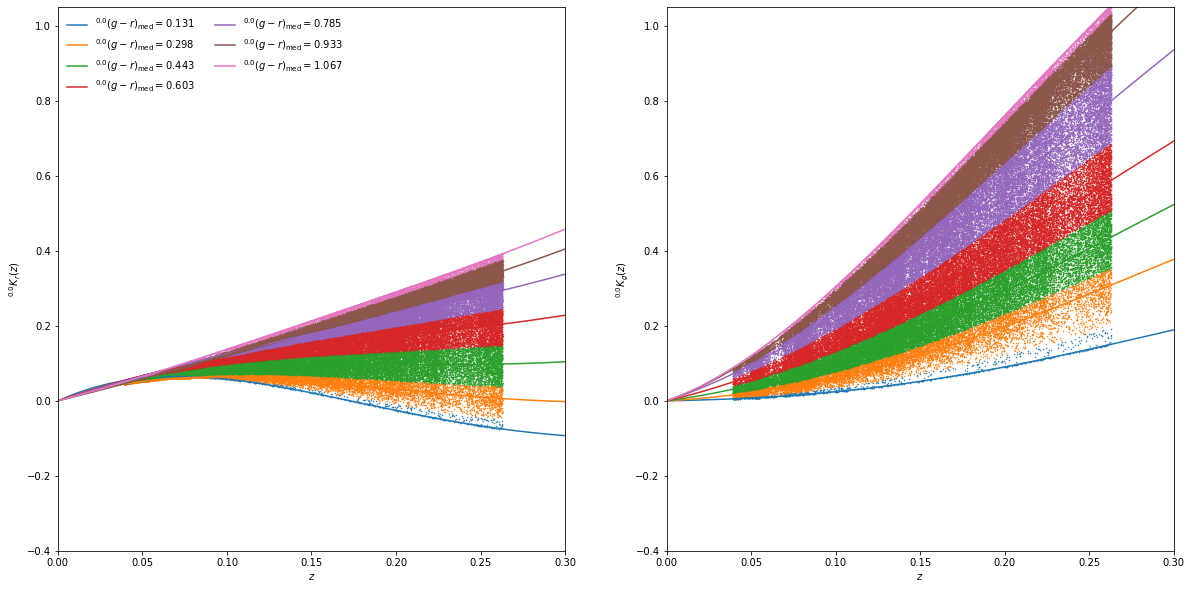

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

test_nonnative_plots(axes, 0.0)

for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx
        
    axes[0].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_R0P0'][isin], s=0.25)
    axes[1].scatter(gama_kE['ZGAMA'][isin], gama_kE['KCORR_G0P0'][isin], s=0.25)
    
    axes[0].set_xlim(0, 0.3)
    axes[1].set_xlim(0, 0.3)

    axes[0].set_ylim(-0.4, 1.05)
    axes[1].set_ylim(-0.4, 1.05)
    
axes[0].legend(ncol=2, frameon=False, loc=2)

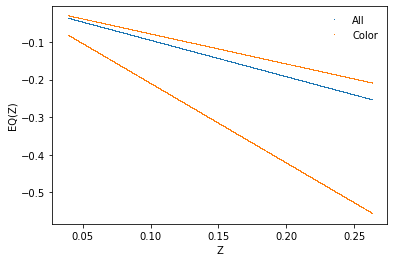

In [15]:
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_ALL_0P0'], marker=',', lw=0.0, label='All')
pl.plot(gama_kE['ZGAMA'], gama_kE['EQ_COLOR_0P0'], marker=',', lw=0.0, label='Color')

pl.xlabel('Z')
pl.ylabel('EQ(Z)')

pl.legend(frameon=False)

In [1]:
_ = pl.hist(gama_kE['MALL_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='All')
_ = pl.hist(gama_kE['MCOLOR_0P0'], histtype='step', bins=np.arange(-24., -16.0, 0.25), label='Color')

pl.xlabel(r'$^{0.0}M$', fontsize=16)

pl.ylabel('N')

pl.legend(frameon=False)

NameError: name 'pl' is not defined

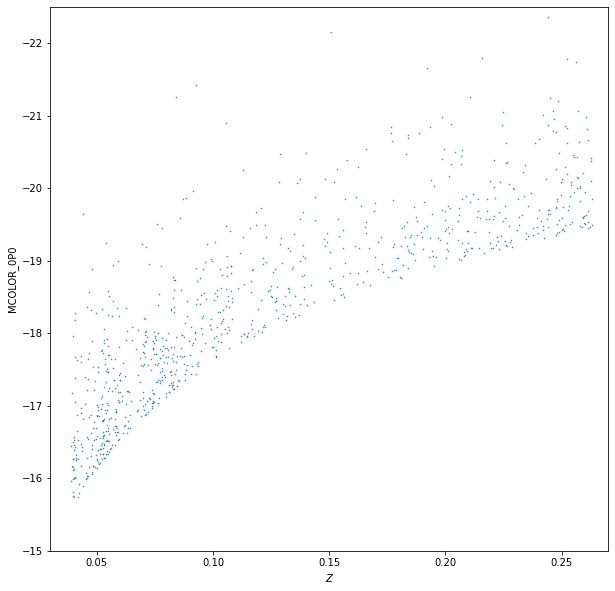

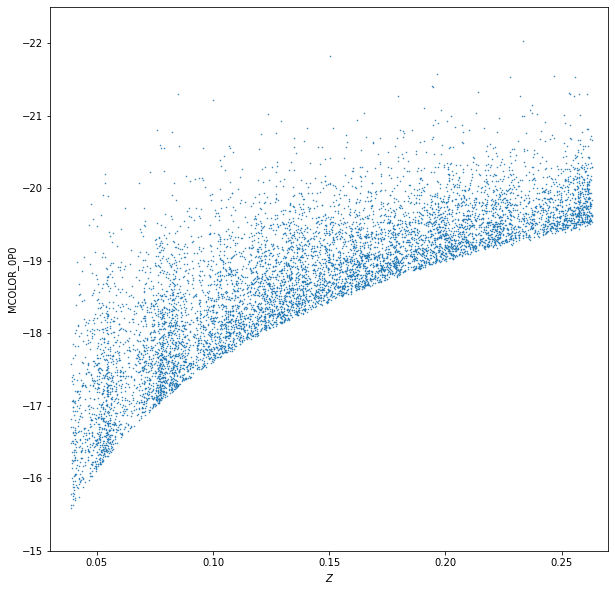

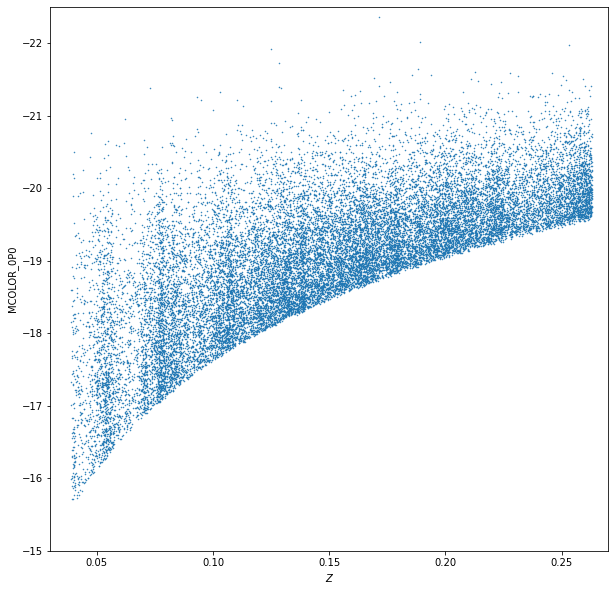

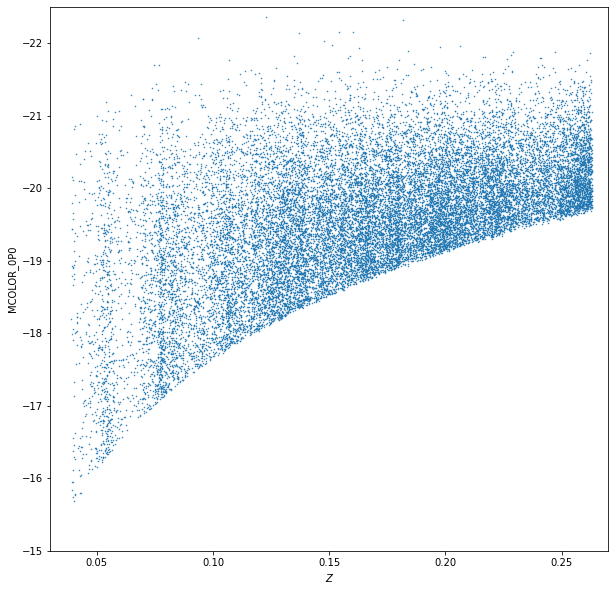

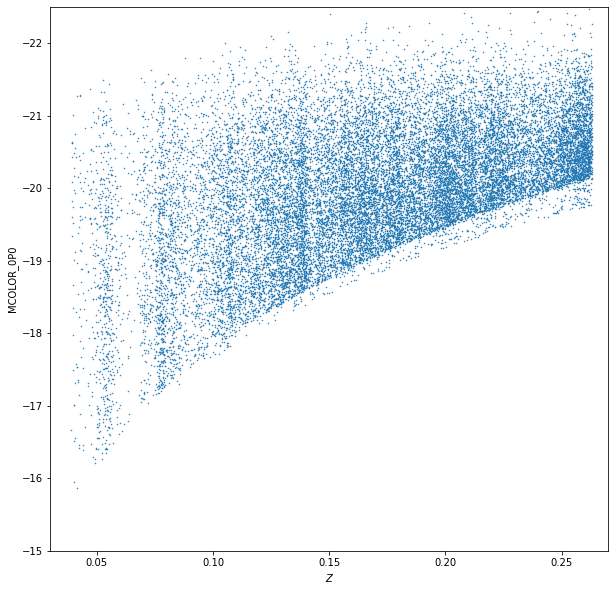

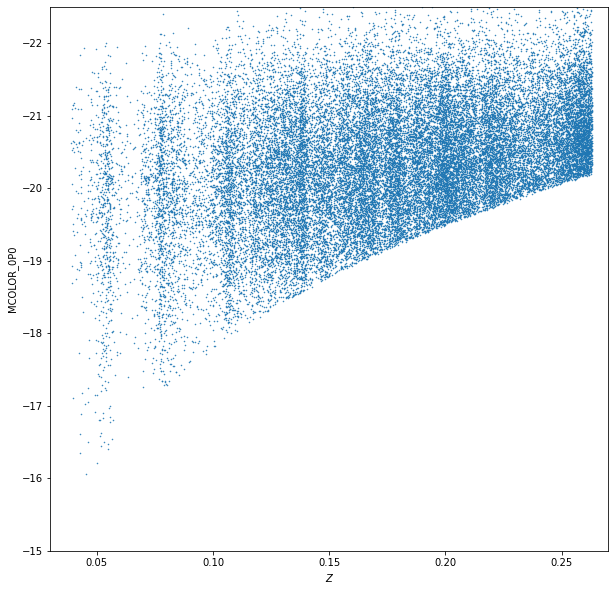

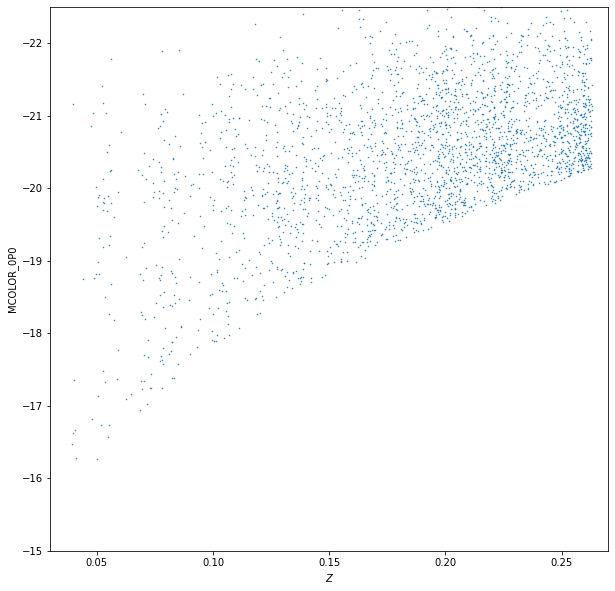

In [17]:
for idx in np.unique(gama_kE['REST_GMR_0P1_INDEX']):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    pl.sca(ax)
    
    isin = gama_kE['REST_GMR_0P1_INDEX'] == idx

    plt.scatter(gama_kE['ZGAMA'][isin], gama_kE['MCOLOR_0P0'][isin], s=0.25)

    plt.xlabel(r'$Z$')
    plt.ylabel(r'MCOLOR_0P0')
    plt.xlim(0.03, 0.27)
    plt.ylim(-15., -22.5)    
    pl.show()

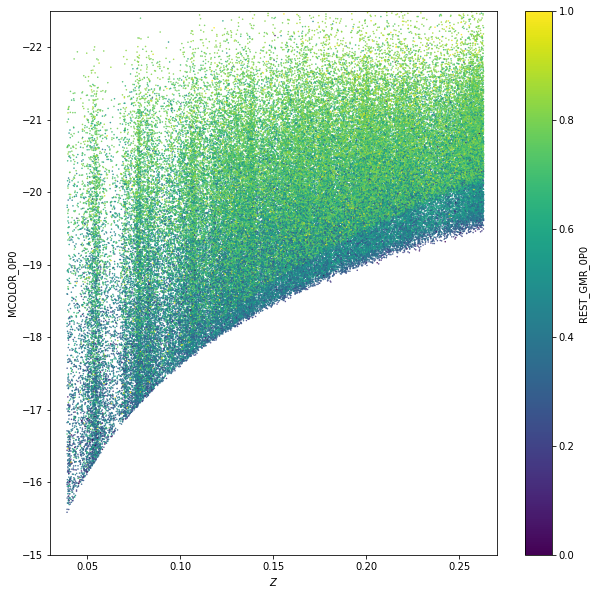

In [18]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['ZGAMA'], gama_kE['MCOLOR_0P0'], c=gama_kE['REST_GMR_0P0'], s=0.25, vmin=0.0, vmax=1.0)
plt.xlabel(r'$Z$')
plt.ylabel(r'$^{0.0}M_{\rm COLOUR}$', fontsize=16)

plt.xlim(0.03, 0.27)
plt.ylim(-15., -22.5)
plt.colorbar(label='REST_GMR_0P0')

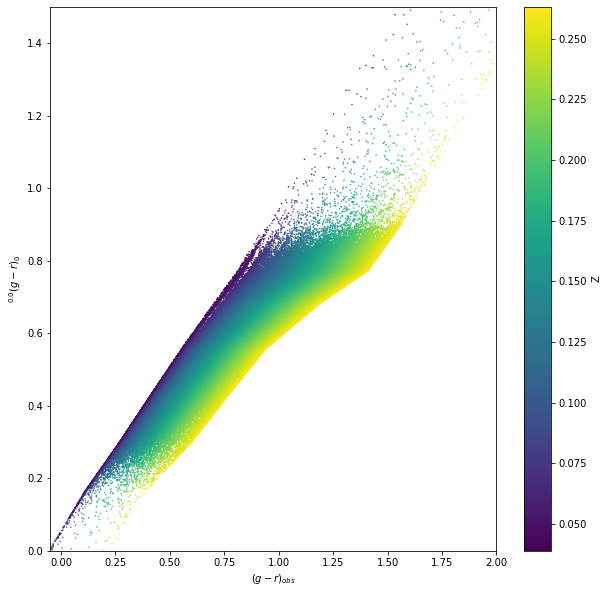

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
pl.sca(ax)

plt.scatter(gama_kE['GMR'], gama_kE['REST_GMR_0P0'], c=gama_kE['ZGAMA'], s=0.25)
plt.xlabel(r'$(g-r)_{obs}$')
plt.ylabel(r'$^{0.0}(g-r)_0$')
plt.xlim(-0.05, 2.0)
plt.ylim( 0.0, 1.5)
plt.colorbar(label='Z')

In [20]:
np.unique(gama_kE['REST_GMR_0P1_WARN'].data)

masked_array(data=[0, 1, 2],
             mask=[False, False, False],
       fill_value=999999,
            dtype=int32)

In [21]:
spurious = gama_kE[gama_kE['REST_GMR_0P1_WARN'].data > 0]
spurious.sort('GMR')
spurious

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,FIELD,CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR
,,deg,deg,mag,,,,,mag,mag,mag,mag,mag,Mpc,,,,,,mag,,,,,,,,mag,mag,,,mag,mag,,
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,bytes4,float64,float64,float64,float32,float64,int32,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64
300927,587726032227270668,131.3272206,1.09080836,18.831516,0.11724,4,G09_Y1_BN1_028,6,24.28935,17.80039,19.094442,18.916586,18.537155,383.7810583202455,37.92041768068411,G9,224.62951790447426,-259.8068095331866,6.314152596351238,-1.2940521,-99.0,2,1,-0.11355235418874031,-0.09522954963899631,0.04772836511763377,0.03261506184962844,-1.2789388207554322,2.12,-0.1137228,-0.24854878,-19.02290697872411,-18.888081004021274,37.85442324459325,37.719597269890414
250320,587726015084036103,214.45952369,2.03787936,19.563774,0.05858,4,G15_Y4_218_043,5,20.229671,18.227365,19.269266,18.401218,16.841839,183.83041848711568,36.32208687932179,G15,143.92052474532102,96.99203585753982,6.030994797643018,-1.0419006,-99.0,2,1,-0.09754854334409607,-0.11801539778216788,0.06373217596227801,0.009829213706456869,-0.9879976725098039,2.12,-0.0568226,-0.12418959,-16.76522234469156,-16.697855353499456,36.32899645357828,36.261629462386175
3586069,587729150376542291,134.93433216,-1.68857138,19.048208,0.1016,4,G09_Y4_207_081,6,21.36026,21.069447,18.996756,18.712885,18.48635,328.96735095614054,37.58576398818161,G9,209.0360161750096,-213.07457059717518,-9.009197981342693,2.072691,-99.0,2,1,-0.10426733235617135,-0.10277204141208078,0.057013386950202735,0.025072570076543968,2.1046317806187758,0.8,-0.098552,-0.08128,-18.496017134934633,-18.513289137929647,37.54422537162897,37.56149737462398
463329,587729774758658180,212.50919903,-1.23042467,18.993248,0.11687,4,G15_Y1_AX2_304,6,21.856676,21.307579,19.185923,18.606459,18.508097,382.47198080656693,37.91299812520232,G15,290.2509924708083,181.57043396168478,-7.644565498873614,2.1216564,-99.0,2,1,-0.11330226386937975,-0.09542074191814612,0.04797845543699433,0.03242386957047863,2.1372110037131953,0.8,-0.11336391,-0.093496,-18.85436468805833,-18.8742325925426,37.847612673898176,37.86748057838245
106622,587722984440529032,216.71278177,0.96640172,18.756065,0.14396,4,G15_Y1_DN2_023,6,21.890177,20.875301,18.743675,18.292803,17.95915,479.88461679130455,38.405684141934145,G15,338.33767691880075,247.9065353510234,6.7359865834783506,2.1316261,-99.0,2,1,-0.1345413892617163,-0.07978275998180517,0.026739330044657783,0.048061851506819575,2.1103036076882287,0.8,-0.13964121,-0.115168,-19.53671689288964,-19.561190105549,38.29278226154198,38.31725547420134
376803,587727943490601117,135.15747214,1.46673551,19.284964,0.05207,4,G09_Y2_010_233,6,18.484238,19.773998,17.6414,17.31554,17.007395,162.60301546426533,36.05564297650389,G9,108.6360578074609,-109.86697523161592,3.8471601834806424,2.1325989,-99.0,2,1,-0.09974506342315637,-0.11966564751392851,0.061535655883217716,0.008178963974696238,2.1859555688616465,0.8,-0.0505079,-0.041656,-16.781707125225253,-16.790559025922008,36.06667073301334,36.075522633710094
64501,587722982831030680,219.36930883,-0.26832705,18.0969,0.13763,4,G15_Y3_033_005,6,21.164711,20.593689,18.45563,18.068895,17.772223,456.840701987018,38.29882395102362,G15,312.56807041806627,252.10455800597163,-2.1940402538128225,2.1380596,-99.0,2,1,-0.1291273968767528,-0.08373353714976081,0.032153322429621295,0.04411107433886394,2.1261018641796245,0.8,-0.1335011,-0.110104,-20.100575235951908,-20.12397233145333,38.197476175893314,38.22087327139474
422141,587728879792685436,129.64207134,2.58860397,19.5044,0.13235,4,G09_

# Done.